# Árboles de Decisión
Para este tema, se va a realizar una clasificación mediante árboles de desición, donde dependiendo de la variedad de una flor (iris), se clasifiquen con éxito 150 muestras de estas.


## Características a tener en cuenta
1.   Ancho y Largo de los pétalos
2.   Sépalos
3.   Variedades de Iris:
      - 50 iris setosa
      - 50 iris versicolor
      - 50 iris virginica

## SE CARGAN LAS LIBRERÍAS.
Aspectos a tener en cuenta se usará un **Dataset** de **Sklearn**, este dataset se puede encontar con el nombre de **_load_iris_**, es de uso libre.


In [2]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## SE CARGA EL DATASET


In [4]:
database_iris = load_iris()

## SE HARA UNA REVISIÓN Y CONOCIMIENTO DE LOS DATOS

In [5]:
print(database_iris.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
print(database_iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [9]:
print(database_iris.filename)

/usr/local/lib/python3.7/dist-packages/sklearn/datasets/data/iris.csv


In [13]:
print(database_iris.target_names)

['setosa' 'versicolor' 'virginica']


In [14]:
print(database_iris.target)
# TENER EN CUENTA QUE SON 3 TARGETS u OBJETIVOS DE CLASIFICACIÓN, entonces 
# Veremos como están transformados esos Strings Valores Númericos 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## TRANSFORMACIÓN DEL DATASET EN UN DATAFRAME
Esto con la finalidad de lograr una visualización mejorada de los datos

In [16]:
df_iris= pd.DataFrame(database_iris.data, columns=database_iris.feature_names)
df_iris['target'] = database_iris.target
df_iris.head(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


## SE SEPARAN LOS DATOS TEST y TRAIN 

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(df_iris[database_iris.feature_names],df_iris['target'], random_state=42)

## SE CREA UNA INSTANCIA DEL ALGORITMO (ÁRBOL DE DESICIÓN)

In [48]:
arbol_clasifi = DecisionTreeClassifier(max_depth=3, random_state=30)

## SE ENTRENA EL ALGORITMO

In [49]:
arbol_clasifi.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=30, splitter='best')

## SE PREDICEN LOS VALORES

In [50]:
# Predición para un registro
#tomamos la información del primer registro (X_test)
print(X_test.iloc[0])
# el verdadero resultado de la flor
print(Y_test.iloc[0])
#le pasamos esos datos al algoritmo
arbol_clasifi.predict(X_test.iloc[0].values.reshape(1, -1))

arbol_clasifi.predict(X_test[0:20])

sepal length (cm)    6.1
sepal width (cm)     2.8
petal length (cm)    4.7
petal width (cm)     1.2
Name: 73, dtype: float64
1


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2])

## SE CALCULA LA EXACTITUD DEL MODELO

In [51]:
accuary = arbol_clasifi.score(X_test, Y_test)
print(accuary)

1.0


## SE GRAFICA EL ÁRBOL 


In [52]:
class_names_list = list(['setosa','versicolor','virginica'])
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data = export_graphviz(arbol_clasifi, feature_names= database_iris.feature_names, class_names=class_names_list)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

## CONOCIENDO LAS CARACTERÍSTICAS MÁS IMPORTANTES

In [53]:
importances = pd.DataFrame({'feature':X_train.columns, 'importance':np.round(arbol_clasifi.feature_importances_,3)})
print(importances)

             feature  importance
0  sepal length (cm)       0.000
1   sepal width (cm)       0.000
2  petal length (cm)       0.404
3   petal width (cm)       0.596


In [54]:
importances = importances.sort_values('importance', ascending=False)
importances.head(10)

,feature,importance
3,petal width (cm),0.596
2,petal length (cm),0.404
0,sepal length (cm),0.000
1,sepal width (cm),0.000


## MEJORANDO EL ÁRBOL DE DESICIÓN

In [55]:
#la profundad de un árbol la medimos con max_depth
# creamos una lista con profundidades de 1 a 6 
max_depth_lista = list(range(1, 6))
# creamos un listado de resultados de exactitud 
accuracy = []
for depth in max_depth_lista:
    
    arbol_clasifi = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    arbol_clasifi.fit(X_train, Y_train)
    score = arbol_clasifi.score(X_test, Y_test)
    accuracy.append(score)

### Se gráfica para ver resultados de mejor manera

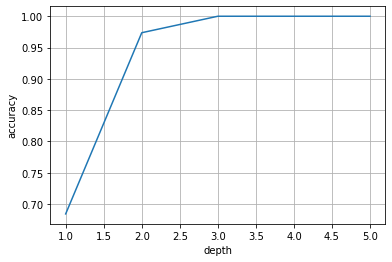

In [56]:
plt.plot(max_depth_lista,accuracy)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show()